## *Optimizing Early Diabetes Detection: A Comparative Analysis of Traditional Machine Learning Baseline and Enhanced Deep Learning Models*

###Diabetes Detection Tool

Author: Muhammad Waqas Mandrey



## *Section 1: Explore Data*

In this section, we explore the data and check for any missing values in the dataset that may need to be addressed and any features consisting of values that may pose redundancy.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/DS402MLProj/

402MLProj.ipynb  diabetesDataset.csv


In [5]:
data = pd.read_csv('/content/drive/MyDrive/DS402MLProj/diabetesDataset.csv')
data.iloc[500:]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
500,66,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
501,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
502,70,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
503,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
504,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
505,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
506,61,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
507,60,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
508,58,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative
509,54,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [8]:
# Number of columns in the dataframe
len(data.columns)

17

In [9]:
# Here we print our columns
print(data.iloc[:, 1:6])
print(data.iloc[:, 6:11])
print(data.iloc[:, 11:16])
print(data.iloc[:, 16:])

     Gender Polyuria Polydipsia sudden weight loss weakness
0      Male       No        Yes                 No      Yes
1      Male       No         No                 No      Yes
2      Male      Yes         No                 No      Yes
3      Male       No         No                Yes      Yes
4      Male      Yes        Yes                Yes      Yes
..      ...      ...        ...                ...      ...
515  Female      Yes        Yes                Yes       No
516  Female      Yes        Yes                Yes      Yes
517  Female      Yes        Yes                Yes      Yes
518  Female       No         No                 No      Yes
519    Male       No         No                 No       No

[520 rows x 5 columns]
    Polyphagia Genital thrush visual blurring Itching Irritability
0           No             No              No     Yes           No
1           No             No             Yes      No           No
2          Yes             No              No     Yes  

In [10]:
# identifying columns with binary values
cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

for i in cols:
  unique_vals = data[i].unique()
  print(unique_vals)

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


## *Section 2: Feature Engineering*

In this section we perform feature engineering on our dataset. Here we begin with performing one-hot encoding to convert our binary categorical features into numerical features.

In [11]:
cat_col = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

data = pd.get_dummies(data, columns = cat_col, drop_first = True)
data

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [12]:
data.columns

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive'],
      dtype='object')

In [13]:
# here we shuffle our data to make it more meaningful
data = data.sample(n = len(data))
data = data.reset_index(drop = True)
data

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
1,40,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1
2,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
3,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
4,45,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0,1
516,58,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1
517,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
518,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1


 Engineering Features Summary

In [14]:
cols_num = data.select_dtypes(include=['number']).shape[1]
cols_cat = data.select_dtypes(exclude=['number']).shape[1]

In [15]:
print('Total number of features:', len(data.columns))
print('Numerical Features:', cols_num)
print('Categorical Features:', cols_cat)

Total number of features: 17
Numerical Features: 17
Categorical Features: 0


## *Section 3: Splitting Data for Training, Validation & Testing*

In this section we split our data into 70% training, 15% validation & 15% test data by fractions.

In [16]:
# here we store 30% of the data as validation and test data combined
df_val_test = data.sample(frac = 0.30)

In [17]:
# here we split the data_valid_test into 50-50 valid and test data
df_val = df_val_test.sample(frac = 0.5)
df_test = df_val_test.drop(df_val.index)

In [18]:
# here we use the remaining data 50% as the training data
df_train = data.drop(df_val_test.index)

In [19]:
df_train.shape

(364, 17)

In [20]:
df_val.shape

(78, 17)

In [21]:
df_test.shape

(78, 17)

Here we preprocess our data as per training the baseline and further for the deep learning model

In [22]:
X_train = df_train.drop('class_Positive', axis = 1)
y_train = df_train['class_Positive']

X_val = df_val.drop('class_Positive', axis = 1)
y_val = df_val['class_Positive']

X_test = df_test.drop('class_Positive', axis = 1)
y_test = df_test['class_Positive']

In [23]:
# this code describes the shape of the training, validation, testing sets
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_val.shape, y_val.shape)
print('Test shapes:',X_test.shape, y_test.shape)

Training shapes: (364, 16) (364,)
Validation shapes: (78, 16) (78,)
Test shapes: (78, 16) (78,)


## *Section 4: Feature Scaling & Baseline Model: Logistic Regression*

In this section we conduct our initial prediction analysis implementing logistic regression as the baseline model.

In [24]:
# Here we import our libraries for baseline and further processing of the data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
# Here we perform feature scaling as some basline models, in our case logistic regression, are sensitive to scale of input features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
# Now we train our baseline model with the training data
bmodel = LogisticRegression(random_state = 42)

bmodel.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
# Now we use the trained model to perform predictions on our validation set
y_val_pred = bmodel.predict(X_val)

In [28]:
# Now we evaluate our model using the following functions
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [29]:
# Here we set our threshold and call the model evaluation functions to determine the performance of the model with the validation set
thresh = 0.5
y_train_preds = bmodel.predict_proba(X_train)[:,1]
y_val_preds = bmodel.predict_proba(X_val)[:,1]

print('Logistic Regression')
print('Training:')
bmodel_train_auc, bmodel_train_accuracy, bmodel_train_recall, \
    bmodel_train_precision, bmodel_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
bmodel_valid_auc, bmodel_valid_accuracy, bmodel_valid_recall, \
    bmodel_valid_precision, bmodel_valid_specificity = print_report(y_val ,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.986
accuracy:0.945
recall:0.963
precision:0.946
specificity:0.917
 
Validation:
AUC:0.943
accuracy:0.897
recall:0.896
precision:0.935
specificity:0.900
 


In [30]:
# Now we use the trained model to perform predictions on our test set
y_test_pred = bmodel.predict(X_test)

In [31]:
# Here we call the model evaluation functions to determine the performance of the model with the test set
y_test_preds = bmodel.predict_proba(X_test)[:,1]

print('Logistic Regression')
print('Test:')
bmodel_valid_auc, bmodel_valid_accuracy, bmodel_valid_recall, \
    bmodel_valid_precision, bmodel_valid_specificity = print_report(y_test, y_test_preds, thresh)

Logistic Regression
Test:
AUC:0.966
accuracy:0.923
recall:0.925
precision:0.961
specificity:0.920
 


In [32]:
features = ['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes']

In [33]:
# Here we perform feature importance over our regression model to identify the priority features for our model
feature_importances = pd.DataFrame(bmodel.coef_[0],
                                   index = features,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [34]:
feature_importances.head()

,importance
Polydipsia_Yes,1.871165
Polyuria_Yes,1.623144
Irritability_Yes,1.152463
Genital thrush_Yes,0.932349
partial paresis_Yes,0.706734


## *Section 5: Design & Implement Deep Learning Model: Feed-Forward Neural Network*

In [35]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(16,)),    # Input layer with 16 features
    keras.layers.Dense(50, activation='relu'),  # We implement the model with 2 hidden layers, with 50 neurons and 30 neaurons respectively
    keras.layers.Dense(30, activation='relu'),  # We implement the model with ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Here we compile our model with the optimizer and further parameters
model.compile(optimizer='Adam',  # We use Adam optimizer
              loss='binary_crossentropy',  # For our binary classification data we implement with Binary cross-entropy loss
              metrics=['accuracy'])  # Here we track accuracy of each run

# Here we train our Feed-forward Neural Network Model
model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
12/12 [==============================] - 2s 33ms/step - loss: 0.6530 - accuracy: 0.6703 - val_loss: 0.6034 - val_accuracy: 0.7949
Epoch 2/15
12/12 [==============================] - 0s 7ms/step - loss: 0.5281 - accuracy: 0.8846 - val_loss: 0.5105 - val_accuracy: 0.8205
Epoch 3/15
12/12 [==============================] - 0s 8ms/step - loss: 0.4419 - accuracy: 0.9093 - val_loss: 0.4443 - val_accuracy: 0.8205
Epoch 4/15
12/12 [==============================] - 0s 11ms/step - loss: 0.3723 - accuracy: 0.9258 - val_loss: 0.3892 - val_accuracy: 0.8974
Epoch 5/15
12/12 [==============================] - 0s 7ms/step - loss: 0.3155 - accuracy: 0.9258 - val_loss: 0.3435 - val_accuracy: 0.9231
Epoch 6/15
12/12 [==============================] - 0s 7ms/step - loss: 0.2711 - accuracy: 0.9258 - val_loss: 0.3112 - val_accuracy: 0.9359
Epoch 7/15
12/12 [==============================] - 0s 13ms/step - loss: 0.2373 - accuracy: 0.9313 - val_loss: 0.2888 - val_accuracy: 0.9231
Epoch 8/15
12/12 

In [36]:
# Here we perform predictions on our test data with the trained model
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [37]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

3/3 [==============================] - 0s 5ms/step - loss: 0.1519 - accuracy: 0.9231
Test Loss: 0.15193887054920197, Test Accuracy: 0.9230769276618958


## *Section 6: Model Evaluation Analysis*

In this section we conduct analysis on our model to determine the accurate results of the model using analysis techniques including F-1 Score, Recall, Precision, AUC score, and AUC-ROC curve.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score

y_train_preds_nn = model.predict(X_train)
y_val_preds_nn = model.predict(X_val)
y_test_preds_nn = model.predict(X_test)

y_train_preds_binary = (y_train_preds_nn > 0.5).astype(int)
y_val_preds_binary = (y_val_preds_nn > 0.5).astype(int)
y_test_preds_binary = (y_test_preds_nn > 0.5).astype(int)

# Here we determine precision, recall, f1-score, AUC, and accuracy based on the training data performance of the model
precision_train = precision_score(y_train, y_train_preds_binary)
recall_train = recall_score(y_train, y_train_preds_binary)
f1_train = f1_score(y_train, y_train_preds_binary)
accuracy_train = accuracy_score(y_train, y_train_preds_binary)
auc_train = roc_auc_score(y_train, y_train_preds_nn)

# Here we determine precision, recall, f1-score, AUC, and accuracy based on the validation data performance of the model
precision_val = precision_score(y_val, y_val_preds_binary)
recall_val = recall_score(y_val, y_val_preds_binary)
f1_val = f1_score(y_val, y_val_preds_binary)
accuracy_val = accuracy_score(y_val, y_val_preds_binary)
auc_val = roc_auc_score(y_val, y_val_preds_nn)

# Here we determine precision, recall, f1-score, AUC, and accuracy based on the testing data performance of the model
precision_test = precision_score(y_test, y_test_preds_binary)
recall_test = recall_score(y_test, y_test_preds_binary)
f1_test = f1_score(y_test, y_test_preds_binary)
accuracy_test = accuracy_score(y_test, y_test_preds_binary)
auc_test = roc_auc_score(y_test, y_test_preds_nn)

print('Training Set Metrics:')
print(f'Precision: {precision_train:.4f}')
print(f'Recall: {recall_train:.4f}')
print(f'F1-score: {f1_train:.4f}')
print(f'Accuracy: {accuracy_train:.4f}')
print(f'AUC: {auc_train:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_train_preds_binary))

print('\nValidation Set Metrics:')
print(f'Precision: {precision_val:.4f}')
print(f'Recall: {recall_val:.4f}')
print(f'F1-score: {f1_val:.4f}')
print(f'Accuracy: {accuracy_val:.4f}')
print(f'AUC: {auc_val:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_preds_binary))

print('\nTest Set Metrics:')
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'F1-score: {f1_test:.4f}')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'AUC: {auc_test:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_preds_binary))

# # Additionaly we compute the confusion matrix
# cm = confusion_matrix(y_test, y_test_preds_binary)
# print('Confusion Matrix:')
# print(cm)

3/3 [==============================] - 0s 6ms/step
Training Set Metrics:
Precision: 0.9680
Recall: 0.9680
F1-score: 0.9680
Accuracy: 0.9615
AUC: 0.9939
Confusion Matrix:
[[138   7]
 [  7 212]]

Validation Set Metrics:
Precision: 0.9111
Recall: 0.8542
F1-score: 0.8817
Accuracy: 0.8590
AUC: 0.9535
Confusion Matrix:
[[26  4]
 [ 7 41]]

Test Set Metrics:
Precision: 0.9434
Recall: 0.9434
F1-score: 0.9434
Accuracy: 0.9231
AUC: 0.9864
Confusion Matrix:
[[22  3]
 [ 3 50]]


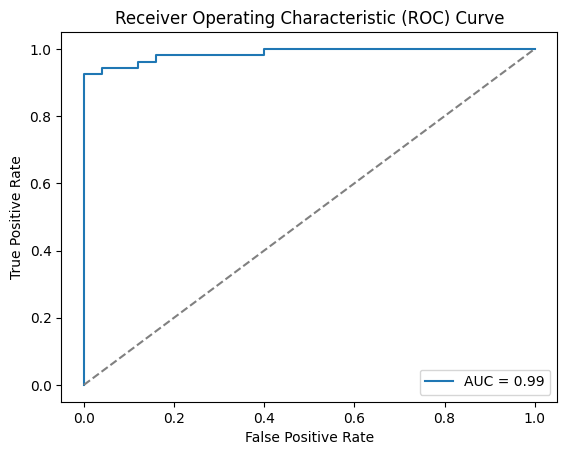

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step
Validation AUC:0.95
Test AUC:0.99


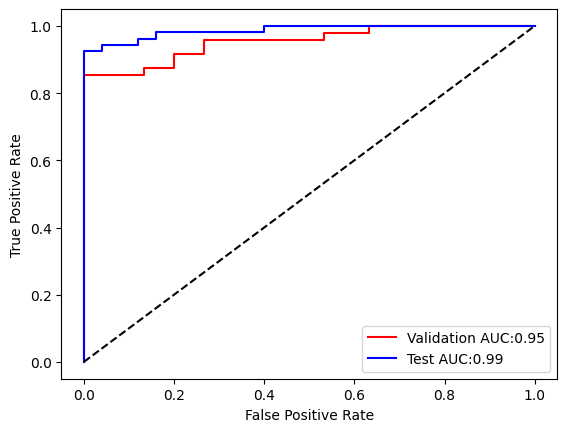

In [40]:
from sklearn.metrics import roc_curve

y_val_pred = model.predict(X_val)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
auc_test = roc_auc_score(y_test, y_pred)

print('Validation AUC:%.2f'%auc_val)
print('Test AUC:%.2f'%auc_test)

plt.plot(fpr_val, tpr_val, 'r-',label ='Validation AUC:%.2f'%auc_val)
plt.plot(fpr_test, tpr_test, 'b-',label ='Test AUC:%.2f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

12/12 [==============================] - 0s 3ms/step
Training AUC:0.99
Validation AUC:0.95
Test AUC:0.99


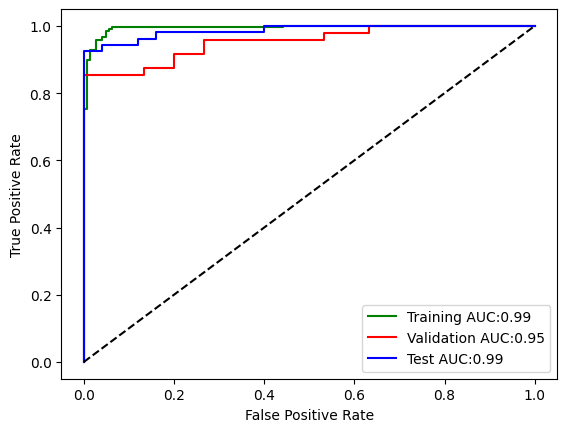

In [41]:
from sklearn.metrics import roc_curve

y_train_pred = model.predict(X_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
auc_test = roc_auc_score(y_test, y_pred)

print('Training AUC:%.2f'%auc_train)
print('Validation AUC:%.2f'%auc_val)
print('Test AUC:%.2f'%auc_test)

plt.plot(fpr_train, tpr_train, 'g-',label ='Training AUC:%.2f'%auc_train)
plt.plot(fpr_val, tpr_val, 'r-',label ='Validation AUC:%.2f'%auc_val)
plt.plot(fpr_test, tpr_test, 'b-',label ='Test AUC:%.2f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()